In [39]:
import numpy as np
from skimage import io, exposure
from pathlib import Path
from matplotlib import pyplot as plt

In [25]:
def load_data_img_as_array(path: Path) -> np.ndarray:
    img = np.expand_dims(io.imread(path, as_gray=False), axis=2)
    img = np.clip(img, a_min=None, a_max=pow(2, 14))
    img = exposure.rescale_intensity(
        img, in_range='uint14', out_range=(0.0, 1.0))
    return img

In [26]:
def load_demo_lr_img_from_dataset(dataset_path: Path):
    img_path = dataset_path/'ProbaV/train/NIR/imgset0648/lr/LR000.png'
    img = load_data_img_as_array(img_path)
    return img

def load_demo_hr_img_from_dataset(dataset_path: Path):
    img_path = dataset_path/'ProbaV/train/NIR/imgset0648/hr.png'
    img = load_data_img_as_array(img_path)
    return img

In [27]:
data_dir = Path('/Volumes/pub/Teams/Projekty ML/SRR/datasets/3 DeepSent/ProbaV_artificial')

In [28]:
hr = load_demo_hr_img_from_dataset(data_dir/'proba-v_b')

In [32]:
datasets = ('proba-v_b',
            'proba-v_bicubic_b',
            'proba-v_bicubic_n_b',
            'proba-v_model-SIMPLE_CONV-dvc-21-09-21-143848_e17_b',
            'proba-v_model-SIMPLE_CONV-dvc-21-09-21-143848_e17_n_b',
            'proba-v_model-AUTOENCODER-dvc-21-09-21-145004_e34_b',
            'proba-v_model-GAN-dvc-21-09-21-134739_e68_b',
            'proba-v_model-SIMPLE_CONV-adapthist-dvc-21-10-14-120809_e13_b',
            'proba-v_model-SIMPLE_CONV-matchhist-dvc-21-10-14-151212_e40_b',
            'proba-v_model-SIMPLE_CONV-single-dvc-21-10-12-111037_e21_b')

In [33]:
lrs = []
for dataset in datasets:
    lrs.append(load_demo_lr_img_from_dataset(data_dir/dataset))

In [36]:
all_lr_pixels = np.concatenate([img.ravel() for img in lrs])
max_display_value = all_lr_pixels.mean() + 3 * all_lr_pixels.std()

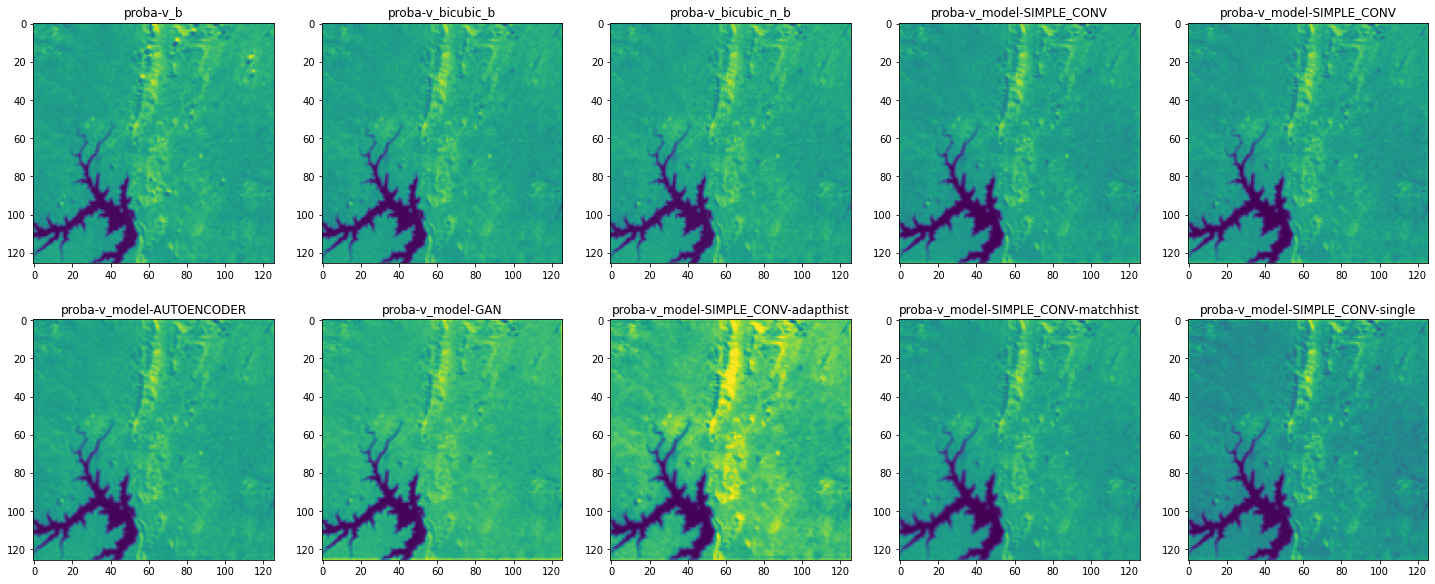

In [71]:
plt.figure(figsize=(25, 10))

for i, img in enumerate(lrs):
    plt.subplot(2, 5, i+1)
    plt.title(datasets[i].split('-dvc')[0])
    plt.imshow(img, vmax=max_display_value)
plt.savefig('comp.png', dpi=600, transparent=False)